In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

import scipy.stats as stats
from scipy.stats import ttest_ind


import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
dfEvents = pd.read_csv("Marketing_events.csv")
dfMall = pd.read_csv("mall_data.csv")
dfArea = pd.read_csv("by_areas_data.csv")

In [108]:
dfEvents['Start time'] = dfEvents['Start time'].str.split(' ').str[0]
dfEvents['End Time'] = dfEvents['End Time'].str.split(' ').str[0]

In [66]:
dfMall.head()

,date,day,eventfromtime,dayname,entry,shoppingtime
0,15/02/2023,Wed,0:00:00,Wed,231,0.0
1,15/02/2023,Wed,1:00:00,Wed,9,0.0
2,15/02/2023,Wed,2:00:00,Wed,3,0.0
3,15/02/2023,Wed,3:00:00,Wed,6,0.0
4,15/02/2023,Wed,4:00:00,Wed,5,0.0


In [67]:
dfArea.head()

,date,eventfromtime,dayname,entrances,exits,waittime,volume,LocationName
0,15/02/2023,0:00:00,Wed,0,0,0.0,0,Area1
1,15/02/2023,0:00:00,Wed,0,0,0.0,0,Area2
2,15/02/2023,0:00:00,Wed,0,0,0.0,0,Area3
3,15/02/2023,0:00:00,Wed,0,0,0.0,0,Area4
4,15/02/2023,0:00:00,Wed,0,0,0.0,0,Ground Floor


### Impact of Event on Mall

In [68]:
dfEvents.head()

,Eventdate,day,Start time,End Time,Area
0,15/02/2023,Thu,11:00:00,18:00:00,Ground floor
1,18/02/2023,Sat,8:00:00,10:00:00,Mall
2,26/02/2023,Sun,9:00:00,23:59:00,Mall
3,27/02/2023,Thu,10:00:00,20:00:00,Area 3
4,28/02/2023,Tue,11:00:00,11:00:00,Area 5


In [101]:
# Storing all events dates that are happeing in whole Mall
MallEventDate = dfEvents['Eventdate'].tolist()

EventDayName = dfEvents['day'].tolist()

# Splitting Mall information into event and without event DataFrame.
dfMallEvent = dfMall[dfMall['date'].isin(MallEventDate)]
dMallNoEvent = dfMall[~dfMall['date'].isin(MallEventDate)]


dfAreaEvent = dfArea[dfArea['date'].isin(MallEventDate)]
dfAreaNoEvent = dfArea[~dfArea['date'].isin(MallEventDate)]


In [70]:
EventDayNameUnique = dfEvents['day'].unique()
EventDayNameUnique = sorted(EventDayNameUnique, key=lambda x: ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'].index(x))
EventDayNameUnique

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

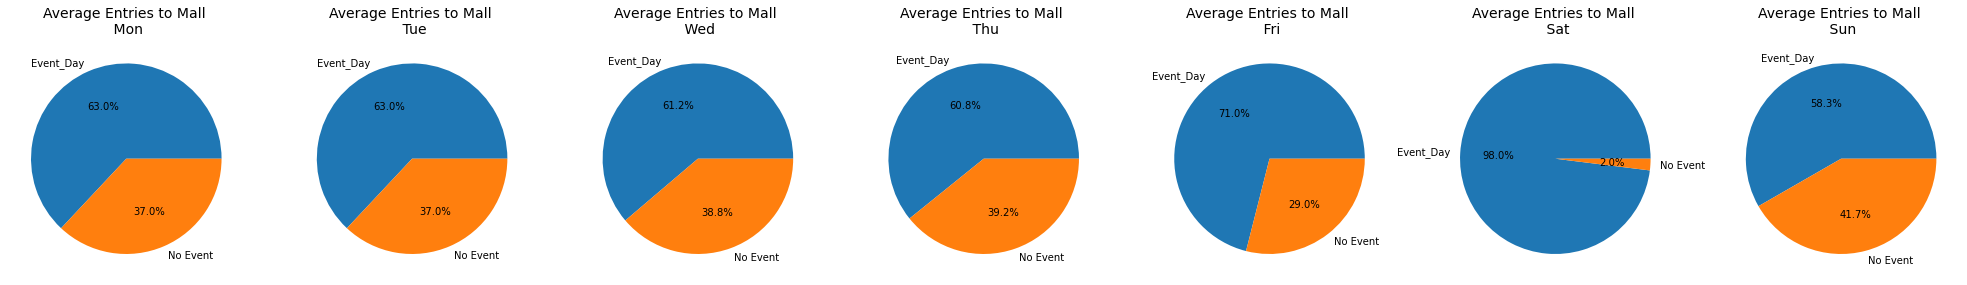

In [71]:
fig, axs = plt.subplots(1, 7, figsize=(35,10))

for i, day in enumerate(EventDayNameUnique):
    Eventdaydf = dfMallEvent[dfMallEvent['day']==day]
    NoEventdaydf= dMallNoEvent[dMallNoEvent['day']==day]

    MeanVisitorEventDay = np.mean(Eventdaydf['entry'])
    MeanVisitorNOEventDay = np.mean(NoEventdaydf['entry'])
    MeanValues = [round(MeanVisitorEventDay,2),round(MeanVisitorNOEventDay,2)]
    Labels = ['Event_Day', 'No Event']

    pie = axs[i].pie(MeanValues,labels=Labels,autopct='%1.1f%%')
  
    axs[i].set_title(f"Average Entries to Mall \n {day}", fontsize = 14)
    


plt.show()

### t-test to compare Event and Non-Event Data. 

In [72]:
for i, day in enumerate(EventDayNameUnique):
    Eventdaydf = dfMallEvent[dfMallEvent['day']==day]
    NoEventdaydf= dMallNoEvent[dMallNoEvent['day']==day]

    t_statistic, p_value = ttest_ind(Eventdaydf['entry'], NoEventdaydf['entry'])
    
    print(f"The comparison of Event day '{day}' with Non event Day '{day}'")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print()
    print()

The comparison of Event day 'Mon' with Non event Day 'Mon'
t-statistic: 2.7389470576843262
p-value: 0.007120089519185901


The comparison of Event day 'Tue' with Non event Day 'Tue'
t-statistic: 2.7616373515136274
p-value: 0.00667196674944091


The comparison of Event day 'Wed' with Non event Day 'Wed'
t-statistic: 2.7838700333585553
p-value: 0.006103678533736986


The comparison of Event day 'Thu' with Non event Day 'Thu'
t-statistic: 2.4310898190206167
p-value: 0.016299909793170385


The comparison of Event day 'Fri' with Non event Day 'Fri'
t-statistic: 4.389172518189973
p-value: 2.2061001556672754e-05


The comparison of Event day 'Sat' with Non event Day 'Sat'
t-statistic: 11.158407613258767
p-value: 3.535560990987213e-20


The comparison of Event day 'Sun' with Non event Day 'Sun'
t-statistic: 1.9700588153479757
p-value: 0.0511740453880483




The t-test is used to determine whether two sets of data are significantly different from each other. The t-statistic measures the difference between the means of two groups relative to the variance within each group. Now we can reject Null hypothesis which says there is no significant difference between two groups.

In [73]:
Eventdaydf.head()

,date,day,eventfromtime,dayname,entry,shoppingtime
264,26/02/2023,Sun,0:00:00,Sun,203,0.0
265,26/02/2023,Sun,1:00:00,Sun,13,0.0
266,26/02/2023,Sun,2:00:00,Sun,6,0.0
267,26/02/2023,Sun,3:00:00,Sun,1,0.0
268,26/02/2023,Sun,4:00:00,Sun,1,0.0


### Reletive Strength of Events

Here, we are comparing the strength of event. Let say two or more events on two or more different dates but the day is same. This analysis will show what is the relvent strength of those event when compare to each other. Which event is stronger than other or others. 

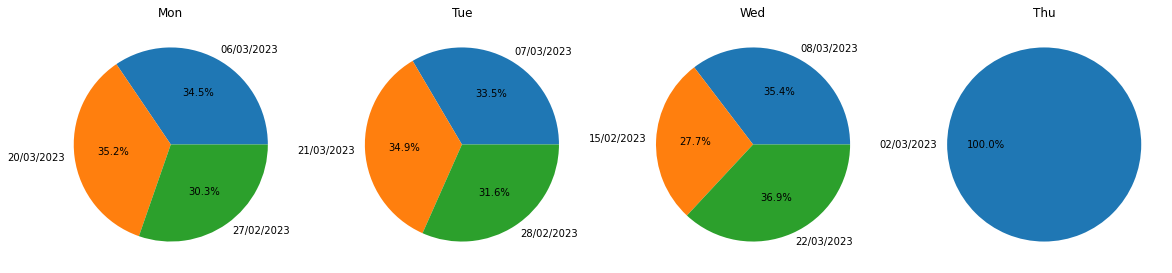

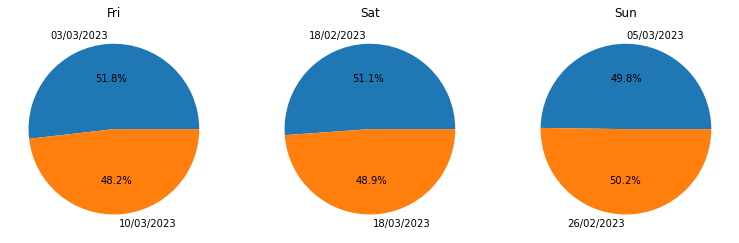

 Checking Statistical Significant



Comparing the mean of Events happens on Mon
F-value=0.1745422610439599, p-value=0.8402110045237213



Comparing the mean of Events happens on Tue
F-value=0.0677805147935781, p-value=0.9345276922580464



Comparing the mean of Events happens on Wed
F-value=0.6115579886915401, p-value=0.5454190568028312

Comparing the mean of Events happens on Thu
Number of column is less than two


Comparing the mean of Events happens on Fri
F-value=0.04003203090987653, p-value=0.8422998939522205


Comparing the mean of Events happens on Sat
F-value=0.04407198671900075, p-value=0.8346468094844954


Comparing the mean of Events happens on Sun
F-value=0.001227577388621803, p-value=0.9722019960029484


In [74]:
fig, axs = plt.subplots(1, 4, figsize=(20, 10))
for i, day in enumerate(EventDayNameUnique[:4]):
    Eventdaydf = dfMallEvent[dfMallEvent['day']==day]
    axs[i].pie(Eventdaydf.groupby('date')['entry'].mean(), labels=Eventdaydf.groupby('date')['entry'].mean().index,autopct='%1.1f%%')
    axs[i].set_title(day)
    
fig, axs = plt.subplots(1, 3, figsize=(13, 10))
for i, day in enumerate(EventDayNameUnique[4:]):    
    
    Eventdaydf = dfMallEvent[dfMallEvent['day']==day]
    axs[i].pie(Eventdaydf.groupby('date')['entry'].mean(), labels=Eventdaydf.groupby('date')['entry'].mean().index,autopct='%1.1f%%')
    axs[i].set_title(day)
plt.show()

# Check whether the different between means is statistically significant of not
print(" Checking Statistical Significant")
                           
for i, day in enumerate(EventDayNameUnique[:]):
    Eventdaydf = dfMallEvent[dfMallEvent['day']==day]
    try:

        dfAnova = pd.DataFrame() 
        for i,date in enumerate(Eventdaydf['date'].unique()):
            df1 = Eventdaydf[Eventdaydf['date']==date]
            col = df1['entry'].tolist()
            print()
            dfAnova.loc[:, f'column_{i}'] = col

        fvalue, pvalue = f_oneway(*[dfAnova[col] for col in dfAnova.columns])
        print(f"Comparing the mean of Events happens on {day}")
        print(f'F-value={fvalue}, p-value={pvalue}')
    except:
        print(f"Comparing the mean of Events happens on {day}")
        print("Number of column is less than two")

The results of an ANOVA test can be interpreted by examining the F-value and p-value. The F-value is a measure of the variation between groups relative to the variation within groups. A large F-value indicates that the variation between groups is greater than the variation within groups, which suggests that there is a significant difference between at least two of the groups. The p-value is a measure of the probability of observing a test statistic as extreme as the one computed from the sample data, assuming that the null hypothesis is true. A small p-value (less than 0.05) indicates that there is strong evidence against the null hypothesis, which suggests that at least two of the groups are significantly different from each other.

## Impact of Events on Shopping Time

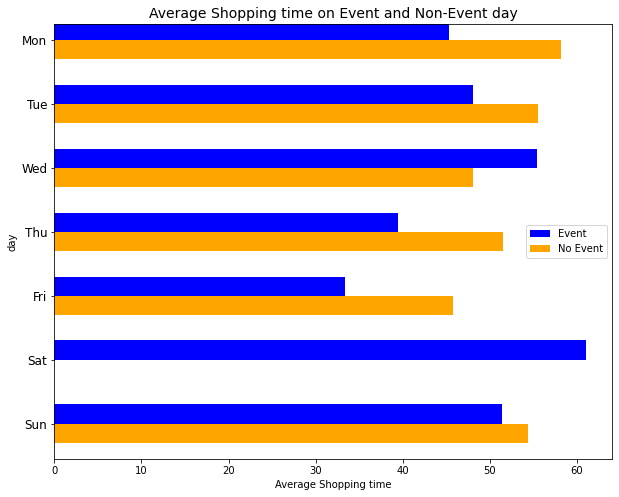

In [75]:
# Define the weekday order
weekday_order = ['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon']

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 8))

dfMallEvent.groupby('day')['shoppingtime'].mean().reindex(weekday_order).plot(kind='barh', position=0, width=0.3, label='Event', ax=ax, color='blue')
dMallNoEvent.groupby('day')['shoppingtime'].mean().reindex(weekday_order).plot(kind='barh', position=1, width=0.3, label='No Event', ax=ax, color='orange')

ax.set_yticklabels(weekday_order, fontsize=12)
ax.set_title('Average Shopping time on Event and Non-Event day', fontsize=14)
ax.set_xlabel("Average Shopping time")
ax.legend()
plt.show()

print()


### t-test to compare Shipping time for Event and Non-Event Data.

In [76]:
for day in weekday_order:
    
    dfMallEvent_t_test  = dfMallEvent[dfMallEvent['day'] == day]
    dMallNoEvent_t_test = dMallNoEvent[dMallNoEvent['day'] == day]
    
    t_statistic, p_value = ttest_ind(dfMallEvent_t_test['shoppingtime'], dMallNoEvent_t_test['shoppingtime'])
    print(day)
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print()

Sun
t-statistic: -0.28479494643312864
p-value: 0.776300465155417

Sat
t-statistic: 5.826358817559982
p-value: 5.0122254921857587e-08

Fri
t-statistic: -1.1124425680855665
p-value: 0.2678276630706708

Thu
t-statistic: -1.0503529333132031
p-value: 0.29534014718018997

Wed
t-statistic: 0.870940822940539
p-value: 0.38525649644042614

Tue
t-statistic: -0.9562306667825033
p-value: 0.34091067759989735

Mon
t-statistic: -1.587117702166274
p-value: 0.11516209141147568



The t-test is used to determine whether two sets of data are significantly different from each other. The t-statistic measures the difference between the means of two groups relative to the variance within each group. Now we can reject Null hypothesis which says there is no significant difference between two groups.

## Impact of Event on Mall over time

In [77]:
def check_matching_time(start1, start2, end2):
      if start1 >= start2 and start1 <= end2:
        return "Yes"
      else:
        return ""

In [78]:
renamedDfEvents = dfEvents.rename(columns = {'Start time': 'eventfromtime', 'Eventdate': 'date'})

In [79]:
mergedDf = dfMallEvent.merge(renamedDfEvents, on = ['date'], how = 'outer')
mergedDf['eventfromtime_x'] = pd.to_datetime(mergedDf['eventfromtime_x'], format='%H:%M:%S').dt.time
mergedDf['eventfromtime_y'] = pd.to_datetime(mergedDf['eventfromtime_y'], format='%H:%M:%S').dt.time
mergedDf['End Time'] = pd.to_datetime(mergedDf['End Time'], format='%H:%M:%S').dt.time
mergedDf['date'] = pd.to_datetime(mergedDf['date']).dt.date
renamedDfEvents['date'] = pd.to_datetime(renamedDfEvents['date']).dt.date
mergedDf = mergedDf.dropna()

In [80]:
mergedDf['event'] = mergedDf.apply(lambda x: check_matching_time(x["eventfromtime_x"], x["eventfromtime_y"], x["End Time"]), axis=1)

In [81]:
mergedDf = mergedDf.sort_values(by = ['date', 'eventfromtime_x'])

In [82]:
pivot = mergedDf.pivot(index = 'eventfromtime_x', columns = 'date', values = 'entry').dropna().sort_values(by = 'eventfromtime_x').transpose().sort_values(by = 'date')

In [83]:
# eventDates = mergedDf[mergedDf['event'] == 'Yes'].date.unique().tolist()
eventDates = renamedDfEvents.dropna().date.unique()

In [84]:
# eventHours = eventDayData[eventDayData['event'] == 'Yes'].eventfromtime_x.values.tolist()

In [85]:
dfMall['eventfromtime'] = pd.to_datetime(dfMall['eventfromtime'], format='%H:%M:%S').dt.time
dfMall['date'] = pd.to_datetime(dfMall['date']).dt.date

annotation = []

for date in eventDates:
    eventDayData = mergedDf[mergedDf['date'] == date]
    eventDayData = eventDayData[eventDayData['event'] == 'Yes']
    if (len(eventDayData)>0):
        eventDay = eventDayData['day_x'].unique()[0]
    eventHours = eventDayData['eventfromtime_x'].values.tolist()

    nonEventDayData = dfMall[(dfMall['day'] == eventDay) & (dfMall['date'] != date) & 
                               (dfMall['eventfromtime'].isin(eventHours))]
    
    tvalues = []
    pvalues = []
    
    for i in range(0, len(eventDayData)):
        eventDayVisits = (eventDayData.iloc[i:i+2, 4])
        nonEventDayVisits = (nonEventDayData.iloc[i:i+2, 4])
        if len(eventDayVisits) == 1:
            eventDayVisits = eventDayData.iloc[i-1:i+2, 4]
            nonEventDayVisits = nonEventDayData.iloc[i-1:i+2, 4]
        tvalue, pvalue = (ttest_ind(eventDayVisits, nonEventDayVisits))
        
        tvalues.append(round(tvalue, 3))
        pvalues.append(round(pvalue, 3))
    
    finalDf = mergedDf[mergedDf['date'] == date]
    rowIndex = finalDf[finalDf['event'] == 'Yes'].index
    
    finalDf.loc[rowIndex, 'tvalue'] = tvalues
    finalDf.loc[rowIndex, 'pvalue'] = pvalues
    
    finalDf = finalDf.fillna("")
    
    finalDf['annot'] = finalDf['event'] + '\n' + 't:' + finalDf['tvalue'].astype('str') + '\n' + 'p:' + finalDf['pvalue'].astype('str')
    
    finalDf = finalDf.replace("\nt:\np:", '')
    
    annotation.append(finalDf['annot'].values.tolist())

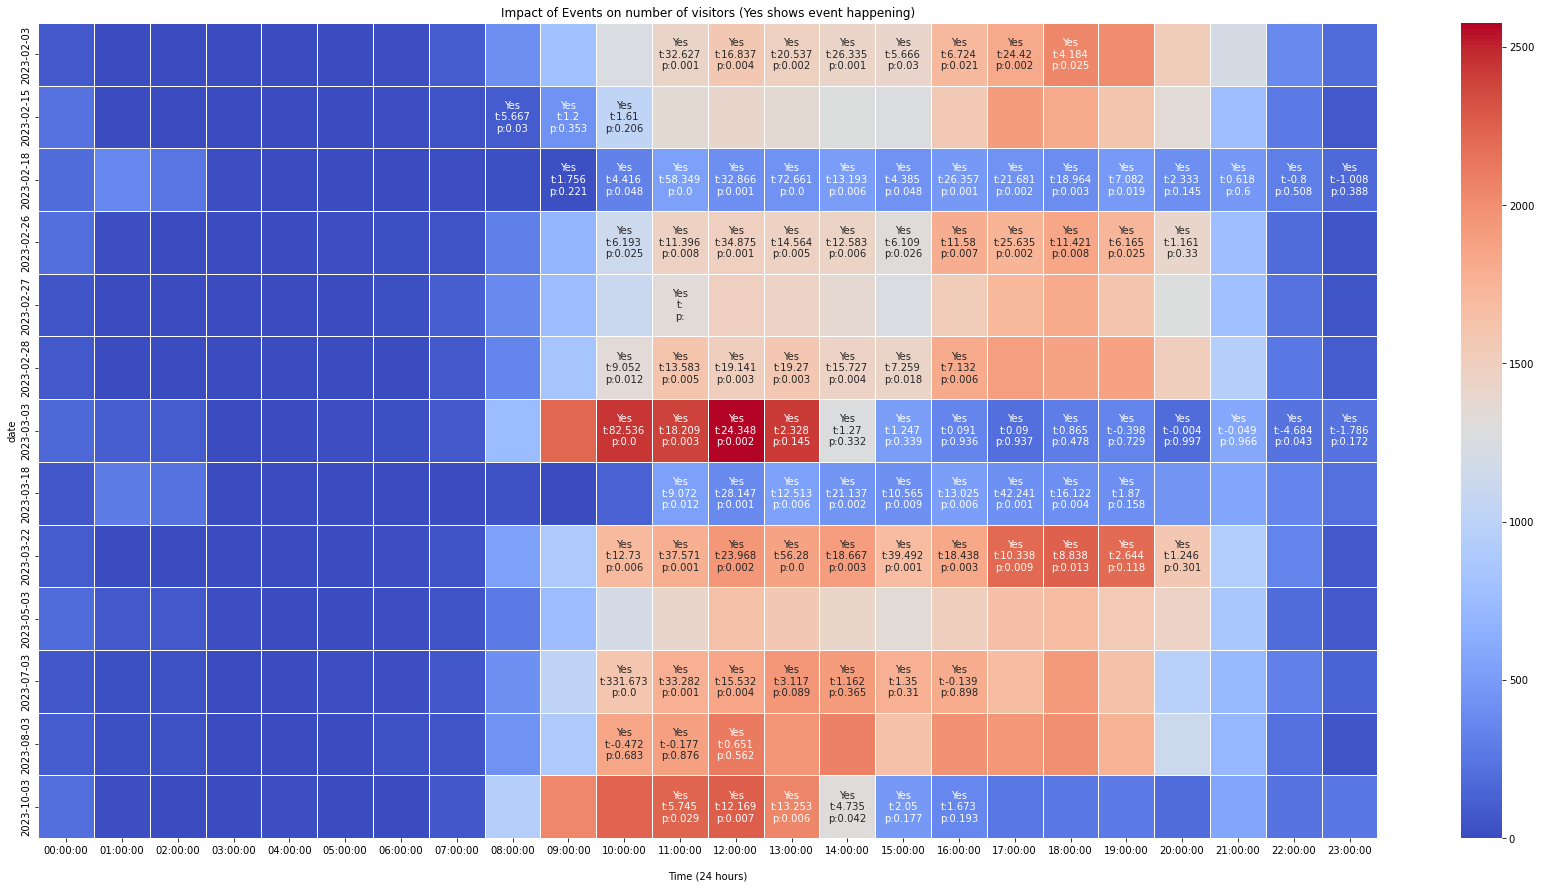

In [86]:
plt.figure(figsize = (30,15))

sns.heatmap(pivot, cmap='coolwarm', linewidths=0.5, annot = np.asarray(annotation), fmt = "")
plt.title('Impact of Events on number of visitors (Yes shows event happening)')
plt.xlabel('\nTime (24 hours)')
plt.show()

The p-value inside the box is the statistical test value that is the comaprison of current and previouse hours visitor with the sample of the same hours taken from non event day. 

### Impact of Events on Area of the Mall and its Comparison with Non Event day

Comparison event day with non Event day 'Wed'

22/02/2023
01/03/2023
15/03/2023
            date eventfromtime dayname  entrances  exits  waittime  volume  \
0     22/02/2023       0:00:00     Wed          0      0      0.00       0   
1     22/02/2023       0:00:00     Wed          0      0      0.00       0   
2     22/02/2023       0:00:00     Wed          0      0      0.00       0   
3     22/02/2023       0:00:00     Wed          0      0      0.00       0   
4     22/02/2023       0:00:00     Wed          0      0      0.00       0   
...          ...           ...     ...        ...    ...       ...     ...   
1315  15/03/2023      23:00:00     Wed          8     11     17.54       1   
1316  15/03/2023      23:00:00     Wed         19     21      5.72       1   
1317  15/03/2023      23:00:00     Wed          6     10     29.70       3   
1318  15/03/2023      23:00:00     Wed          0      0      0.00       0   
1319  15/03/2023      23:00:00     Wed         15     21      

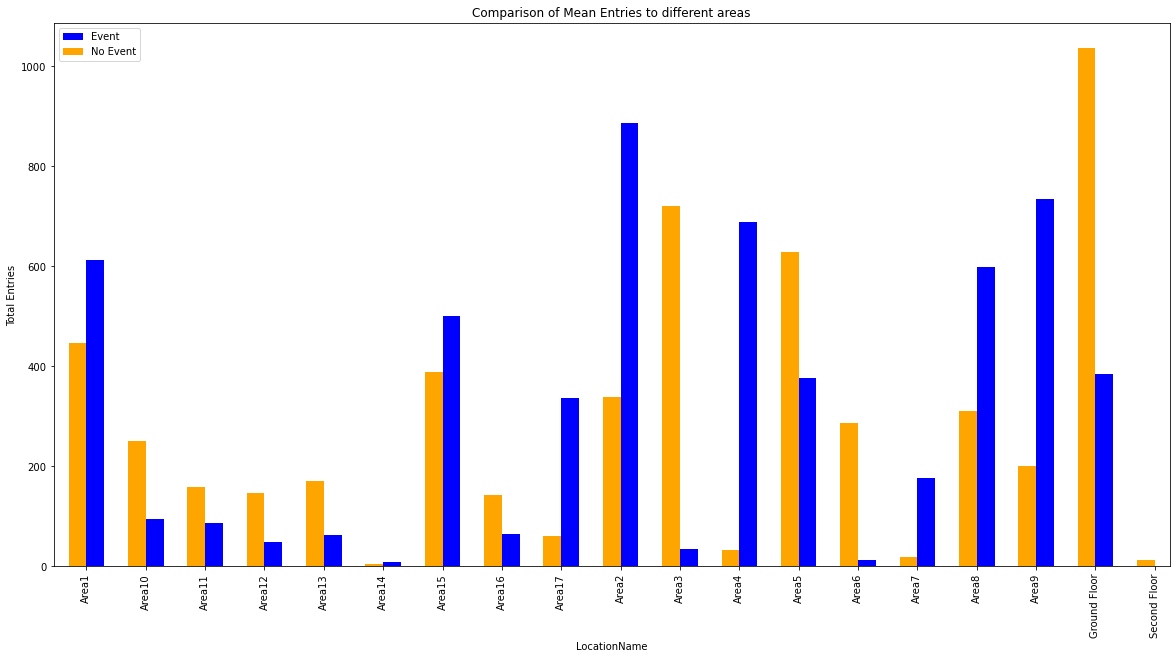



Comparison event day with non Event day 'Mon'

20/02/2023
13/03/2023
           date eventfromtime dayname  entrances  exits  waittime  volume  \
0    20/02/2023       0:00:00     Mon          0      0      0.00       0   
1    20/02/2023       0:00:00     Mon          0      0      0.00       0   
2    20/02/2023       0:00:00     Mon          0      0      0.00       0   
3    20/02/2023       0:00:00     Mon          0      0      0.00       0   
4    20/02/2023       0:00:00     Mon          0      0      0.00       0   
..          ...           ...     ...        ...    ...       ...     ...   
883  13/03/2023      23:00:00     Mon          9     11      7.36       1   
884  13/03/2023      23:00:00     Mon          7      8      3.20       0   
885  13/03/2023      23:00:00     Mon         10     16     12.30       2   
886  13/03/2023      23:00:00     Mon          0      0      0.00       0   
887  13/03/2023      23:00:00     Mon         13     15      9.10       1   

    

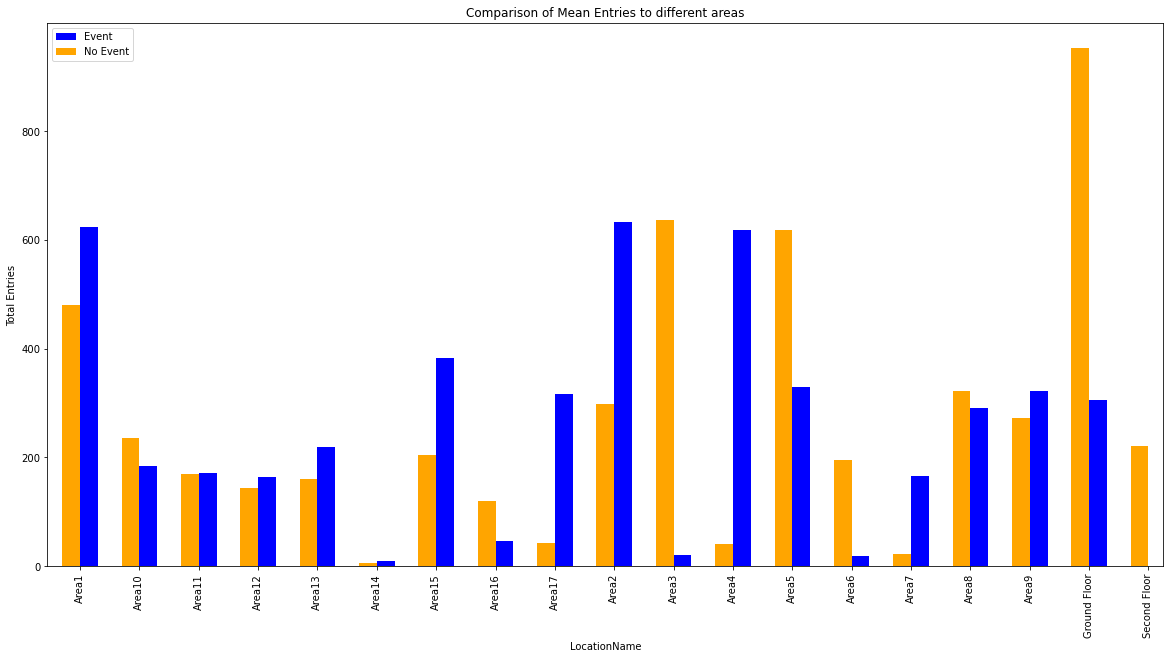



Comparison event day with non Event day 'Tue'

21/02/2023
14/03/2023
           date eventfromtime dayname  entrances  exits  waittime  volume  \
0    21/02/2023       0:00:00     Tue          0      0      0.00       0   
1    21/02/2023       0:00:00     Tue          0      0      0.00       0   
2    21/02/2023       0:00:00     Tue          0      0      0.00       0   
3    21/02/2023       0:00:00     Tue          0      0      0.00       0   
4    21/02/2023       0:00:00     Tue          0      0      0.00       0   
..          ...           ...     ...        ...    ...       ...     ...   
883  14/03/2023      23:00:00     Tue          0      0      0.00       0   
884  14/03/2023      23:00:00     Tue          0      1      0.00       1   
885  14/03/2023      23:00:00     Tue          5     41     50.18      16   
886  14/03/2023      23:00:00     Tue          0      0      0.00       0   
887  14/03/2023      23:00:00     Tue          0      0      0.00       0   

    

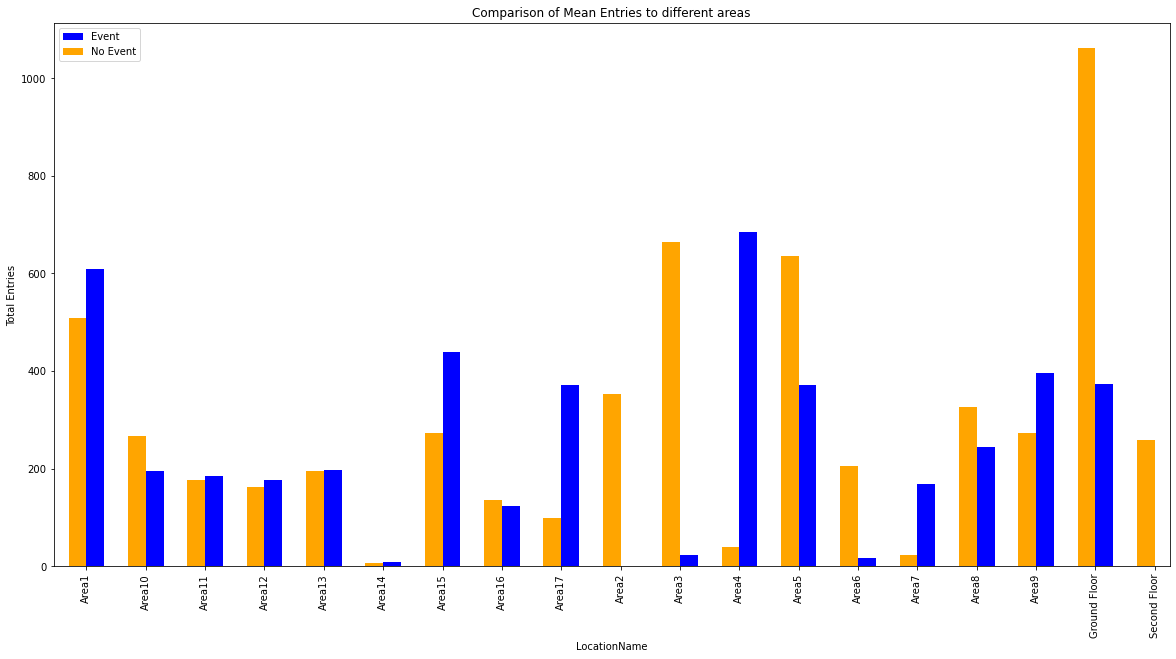



Comparison event day with non Event day 'Wed'

22/02/2023
01/03/2023
15/03/2023
            date eventfromtime dayname  entrances  exits  waittime  volume  \
0     22/02/2023       0:00:00     Wed          0      0      0.00       0   
1     22/02/2023       0:00:00     Wed          0      0      0.00       0   
2     22/02/2023       0:00:00     Wed          0      0      0.00       0   
3     22/02/2023       0:00:00     Wed          0      0      0.00       0   
4     22/02/2023       0:00:00     Wed          0      0      0.00       0   
...          ...           ...     ...        ...    ...       ...     ...   
1315  15/03/2023      23:00:00     Wed          8     11     17.54       1   
1316  15/03/2023      23:00:00     Wed         19     21      5.72       1   
1317  15/03/2023      23:00:00     Wed          6     10     29.70       3   
1318  15/03/2023      23:00:00     Wed          0      0      0.00       0   
1319  15/03/2023      23:00:00     Wed         15     21    

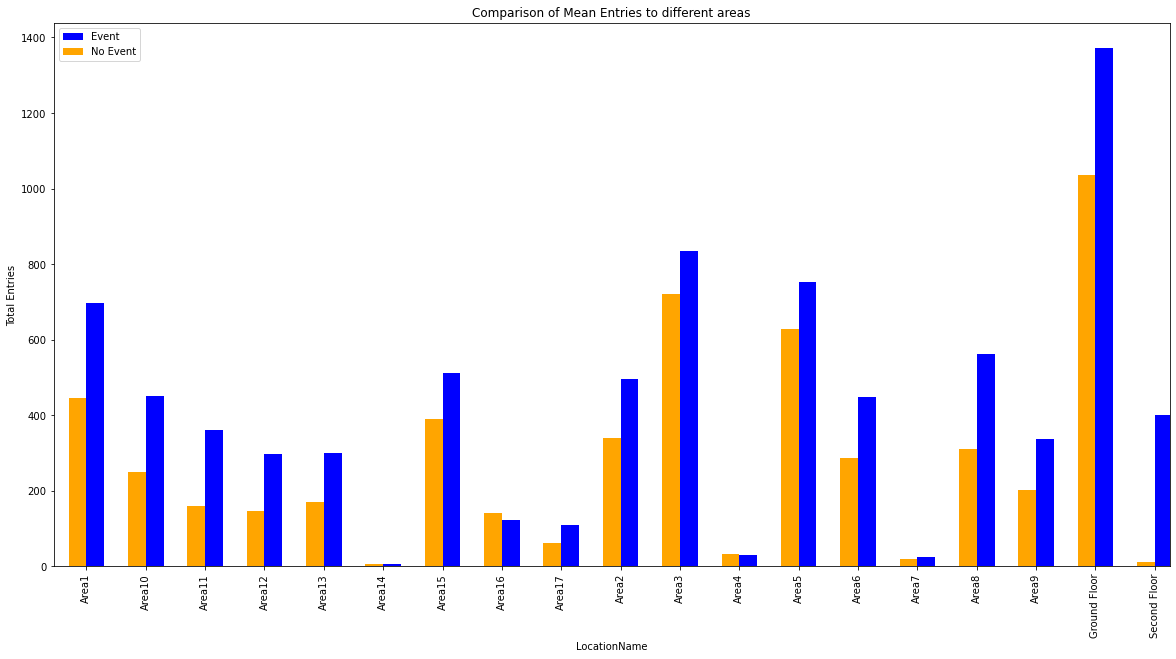



Comparison event day with non Event day 'Tue'

21/02/2023
14/03/2023
           date eventfromtime dayname  entrances  exits  waittime  volume  \
0    21/02/2023       0:00:00     Tue          0      0      0.00       0   
1    21/02/2023       0:00:00     Tue          0      0      0.00       0   
2    21/02/2023       0:00:00     Tue          0      0      0.00       0   
3    21/02/2023       0:00:00     Tue          0      0      0.00       0   
4    21/02/2023       0:00:00     Tue          0      0      0.00       0   
..          ...           ...     ...        ...    ...       ...     ...   
883  14/03/2023      23:00:00     Tue          0      0      0.00       0   
884  14/03/2023      23:00:00     Tue          0      1      0.00       1   
885  14/03/2023      23:00:00     Tue          5     41     50.18      16   
886  14/03/2023      23:00:00     Tue          0      0      0.00       0   
887  14/03/2023      23:00:00     Tue          0      0      0.00       0   

    

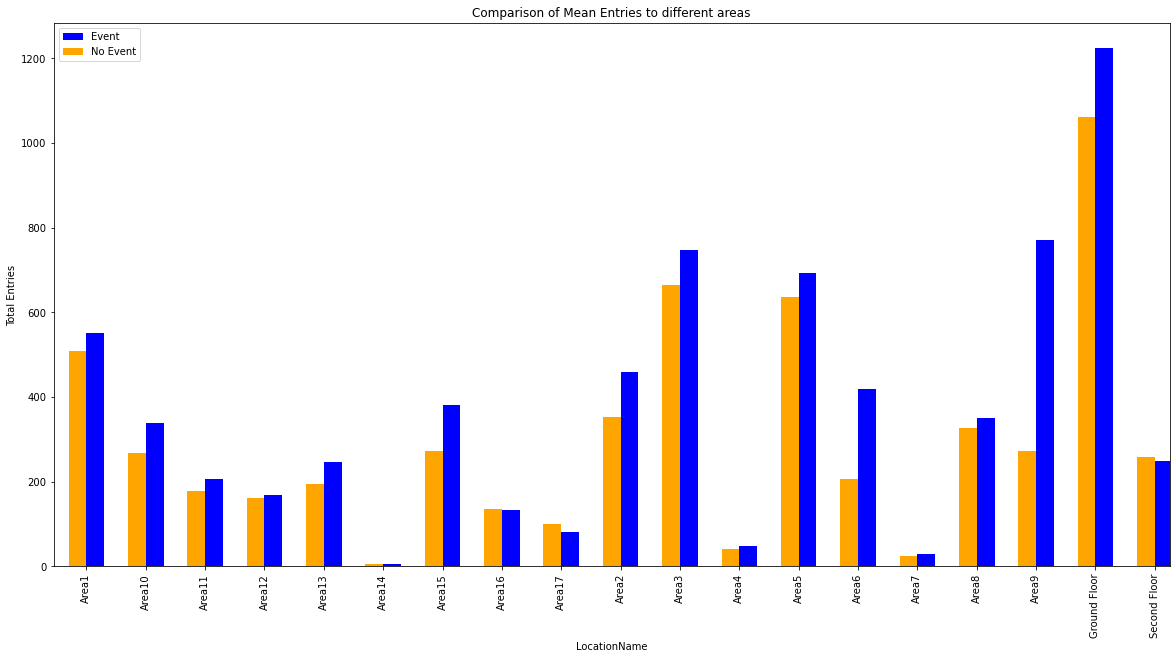



Comparison event day with non Event day 'Wed'

22/02/2023
01/03/2023
15/03/2023
            date eventfromtime dayname  entrances  exits  waittime  volume  \
0     22/02/2023       0:00:00     Wed          0      0      0.00       0   
1     22/02/2023       0:00:00     Wed          0      0      0.00       0   
2     22/02/2023       0:00:00     Wed          0      0      0.00       0   
3     22/02/2023       0:00:00     Wed          0      0      0.00       0   
4     22/02/2023       0:00:00     Wed          0      0      0.00       0   
...          ...           ...     ...        ...    ...       ...     ...   
1315  15/03/2023      23:00:00     Wed          8     11     17.54       1   
1316  15/03/2023      23:00:00     Wed         19     21      5.72       1   
1317  15/03/2023      23:00:00     Wed          6     10     29.70       3   
1318  15/03/2023      23:00:00     Wed          0      0      0.00       0   
1319  15/03/2023      23:00:00     Wed         15     21    

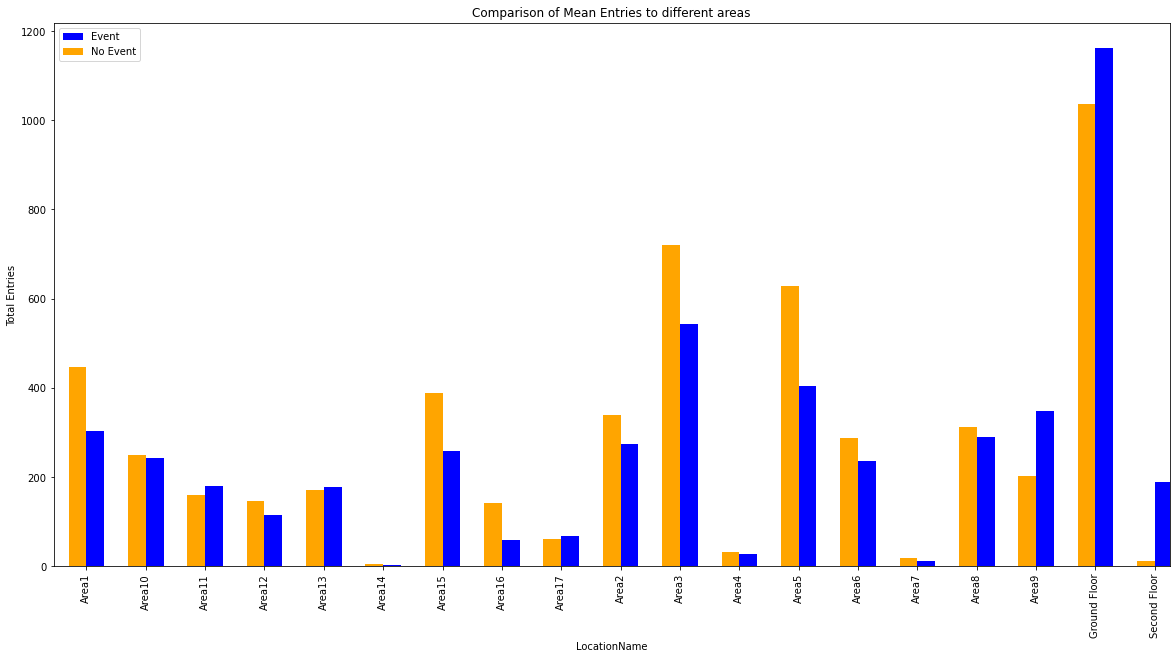

In [117]:
AreaEventdf = dfEvents[dfEvents['Area']!='Mall']
EventDateArea = AreaEventdf['Eventdate'].tolist()

for i, date in enumerate(EventDateArea):
    
    fig, ax = plt.subplots(figsize=(20, 10))
    
    dfAreaSample = dfArea[dfArea['date']==date]
    day = dfAreaSample['dayname'].unique()[0]
    print(f"Comparison event day with non Event day '{day}'")
    print()

    dfAllNonEventSample = pd.DataFrame()
    dfNonEventDaySampleDate = dfAreaNoEvent[dfAreaNoEvent['dayname']==str(day)]['date'].unique()

    for date in dfNonEventDaySampleDate:
        print(date)
        dfNonEventSample = dfArea[dfArea['date']==date]
       
        dfAllNonEventSample  = pd.concat([dfAllNonEventSample, dfNonEventSample],ignore_index=True)
        
        

    AllNonDay = dfNonEventSample.groupby('LocationName')['entrances'].mean().reset_index()
    
    dfAreaSample.groupby('LocationName')['entrances'].mean().plot(kind = 'bar',position=0,width=0.3,label='Event',ax=ax ,color = 'blue')
    AllNonDay.groupby("LocationName")['entrances'].mean().plot(kind = 'bar',position=1,width=0.3,label='No Event', ax=ax, color = 'orange')
    
    EventArea = AreaEventdf['Area'].tolist()[i]
    print(EventArea)
    ax.set_ylabel("Total Entries")
    ax.set_title(f"Comparison of Mean Entries to different areas")
    ax.legend()

    plt.show()
    print()
    print()

# Fuction Implementation

 # Impact of Event on Mall' + 



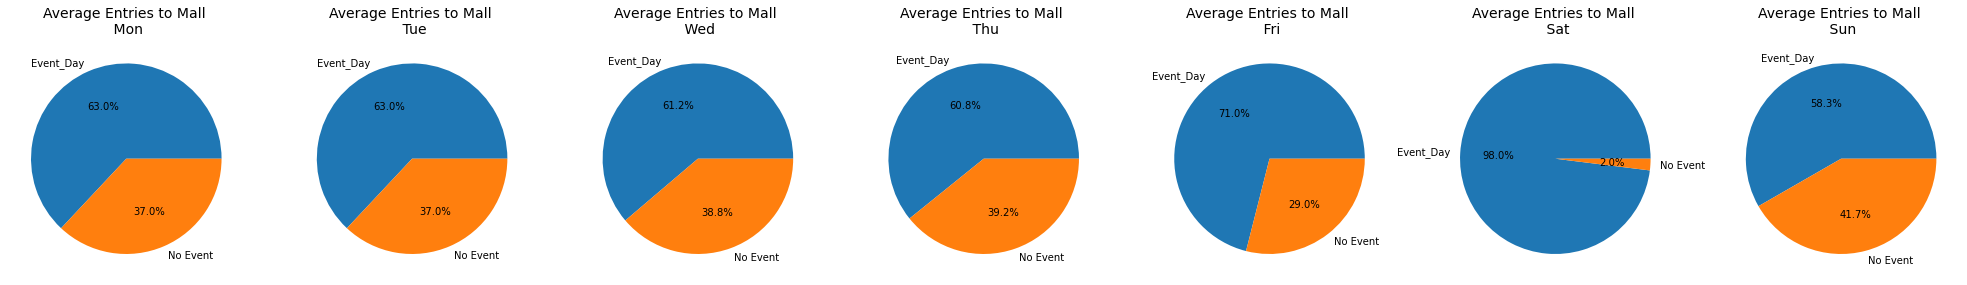

The comparison of Event day 'Mon' with Non event Day 'Mon'
t-statistic: 2.7389470576843262
p-value: 0.007120089519185901


The comparison of Event day 'Tue' with Non event Day 'Tue'
t-statistic: 2.7616373515136274
p-value: 0.00667196674944091


The comparison of Event day 'Wed' with Non event Day 'Wed'
t-statistic: 2.7838700333585553
p-value: 0.006103678533736986


The comparison of Event day 'Thu' with Non event Day 'Thu'
t-statistic: 2.4310898190206167
p-value: 0.016299909793170385


The comparison of Event day 'Fri' with Non event Day 'Fri'
t-statistic: 4.389172518189973
p-value: 2.2061001556672754e-05


The comparison of Event day 'Sat' with Non event Day 'Sat'
t-statistic: 11.158407613258767
p-value: 3.535560990987213e-20


The comparison of Event day 'Sun' with Non event Day 'Sun'
t-statistic: 1.9700588153479757
p-value: 0.0511740453880483


Relative strength of events


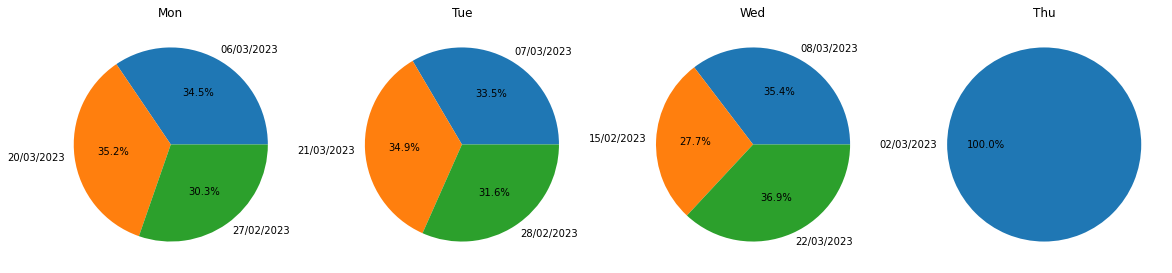

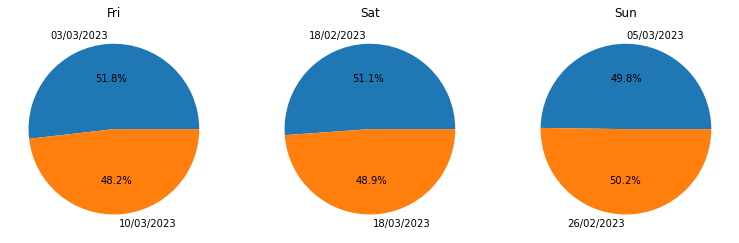

 Checking Statistical Significant



Comparing the mean of Events happens on Mon
F-value=0.1745422610439599, p-value=0.8402110045237213



Comparing the mean of Events happens on Tue
F-value=0.0677805147935781, p-value=0.9345276922580464



Comparing the mean of Events happens on Wed
F-value=0.6115579886915401, p-value=0.5454190568028312

Comparing the mean of Events happens on Thu
Number of column is less than two


Comparing the mean of Events happens on Fri
F-value=0.04003203090987653, p-value=0.8422998939522205


Comparing the mean of Events happens on Sat
F-value=0.04407198671900075, p-value=0.8346468094844954


Comparing the mean of Events happens on Sun
F-value=0.001227577388621803, p-value=0.9722019960029484


# Impact of Event on Shopping Time



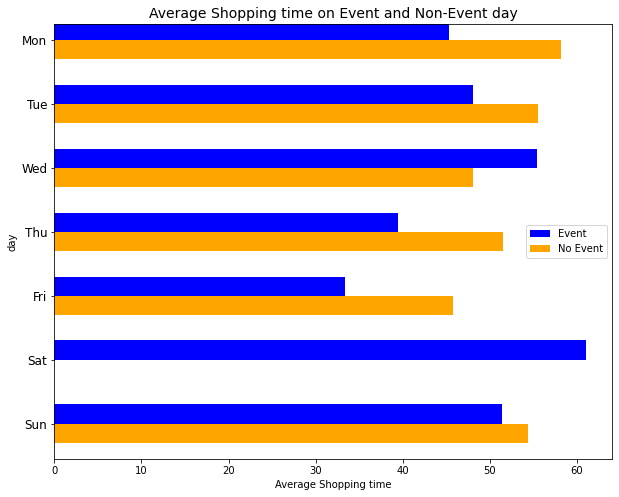

# t-test to compare Shipping time for Event and Non-Event Data.
Sun
t-statistic: -0.28479494643312864
p-value: 0.776300465155417

Sat
t-statistic: 5.826358817559982
p-value: 5.0122254921857587e-08

Fri
t-statistic: -1.1124425680855665
p-value: 0.2678276630706708

Thu
t-statistic: -1.0503529333132031
p-value: 0.29534014718018997

Wed
t-statistic: 0.870940822940539
p-value: 0.38525649644042614

Tue
t-statistic: -0.9562306667825033
p-value: 0.34091067759989735

Mon
t-statistic: -1.587117702166274
p-value: 0.11516209141147568



# Impact of Event on Mall over time



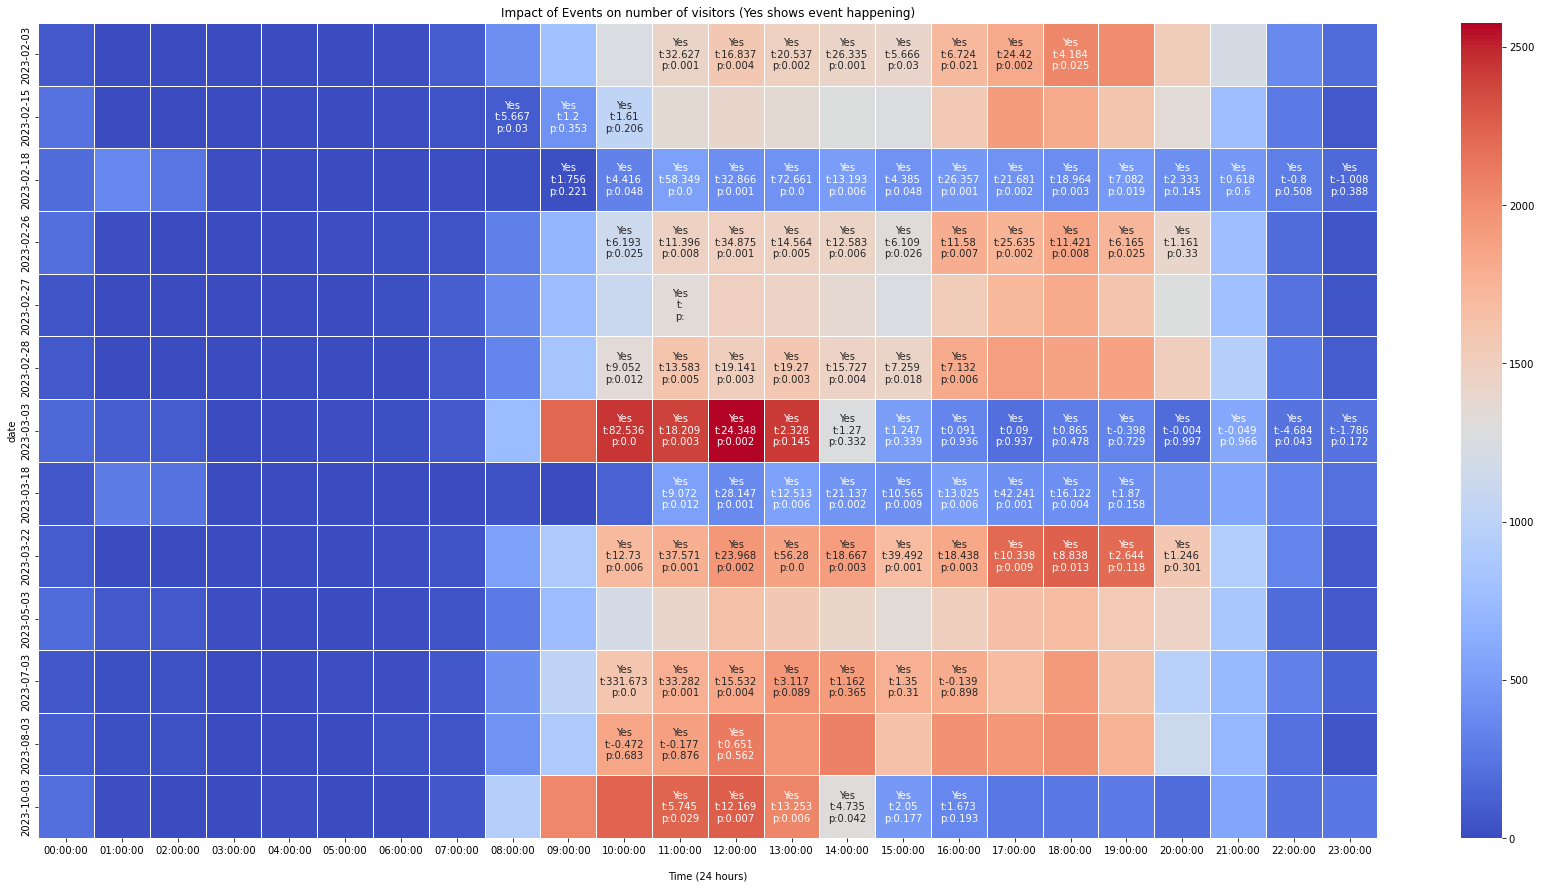



# Impact of Events on Area of the Mall

Comparison event day with non Event day 'Wed'

22/02/2023
01/03/2023
15/03/2023
Ground floor


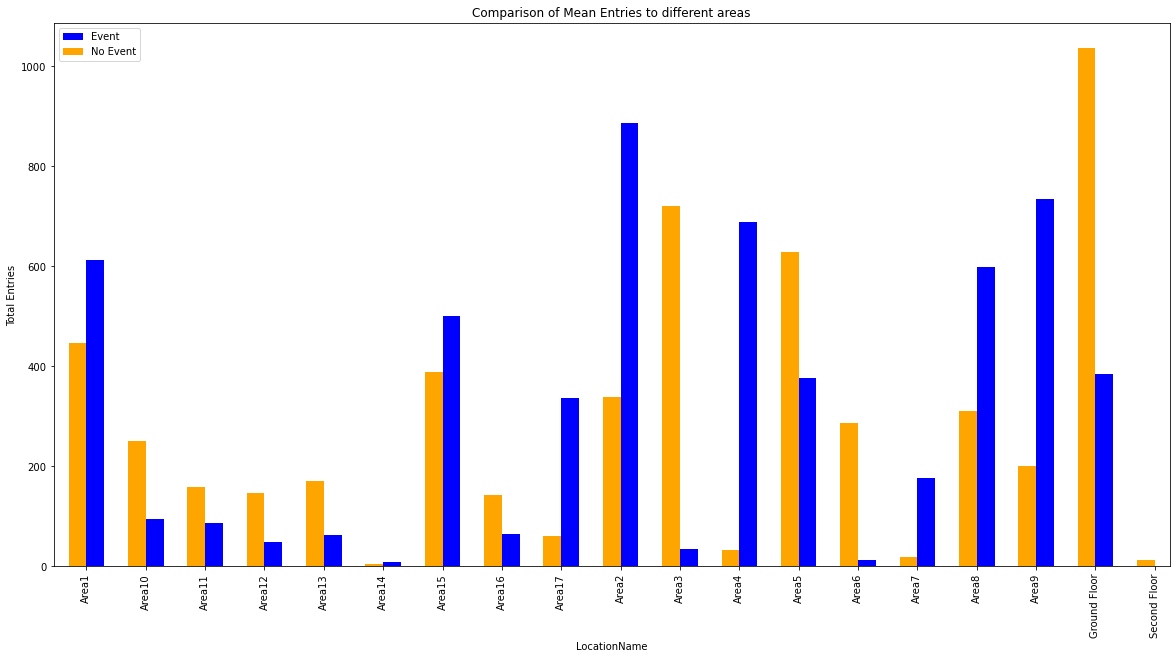



Comparison event day with non Event day 'Mon'

20/02/2023
13/03/2023
Area 3


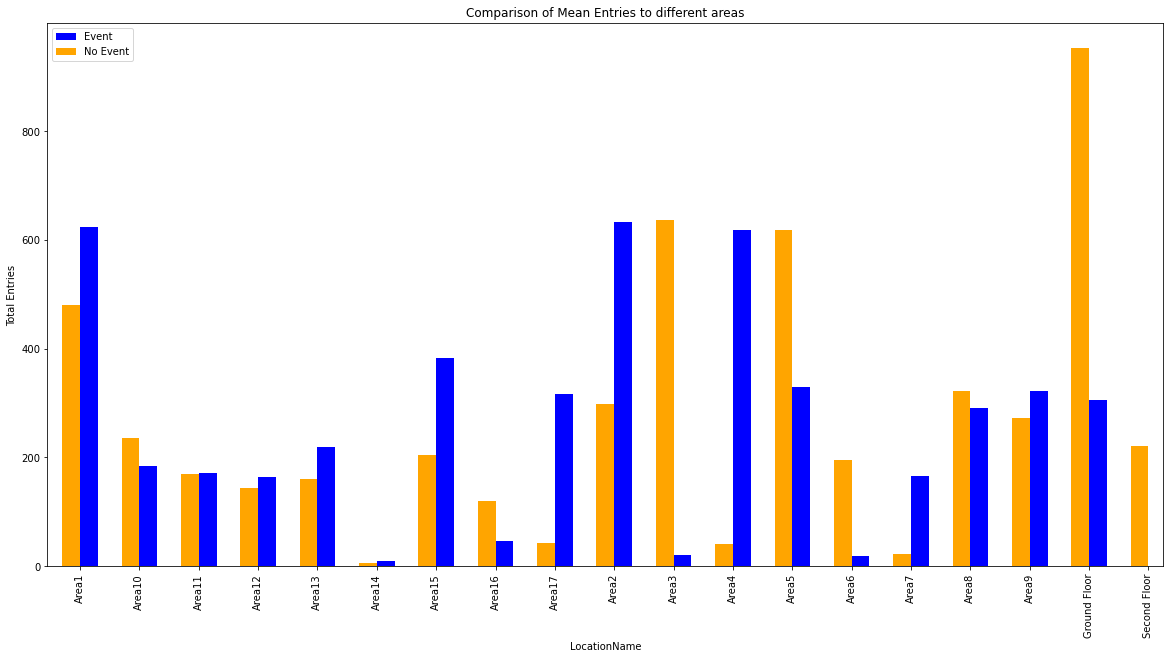



Comparison event day with non Event day 'Tue'

21/02/2023
14/03/2023
Area 5


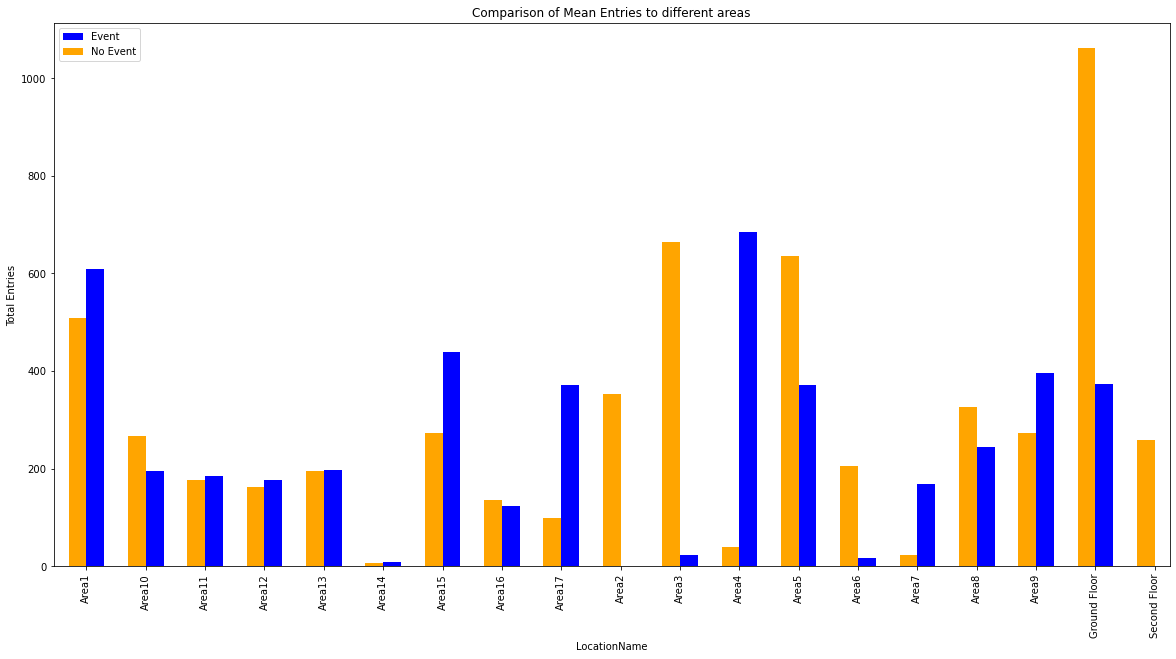



Comparison event day with non Event day 'Wed'

22/02/2023
01/03/2023
15/03/2023
Ground floor


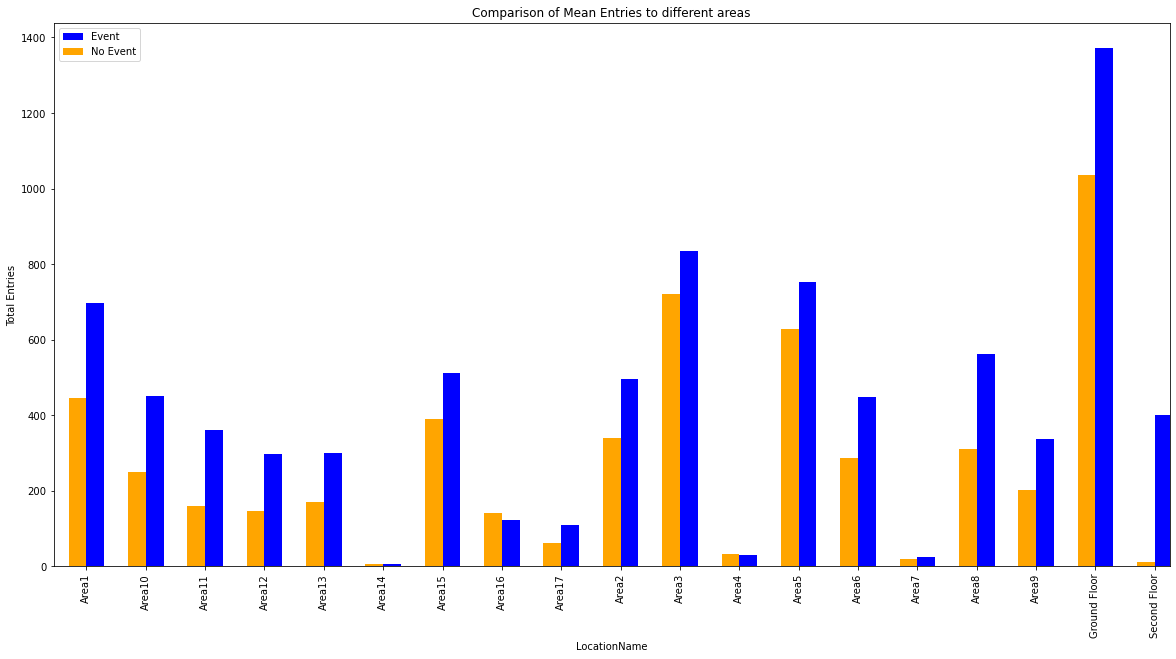



Comparison event day with non Event day 'Tue'

21/02/2023
14/03/2023
Ground floor


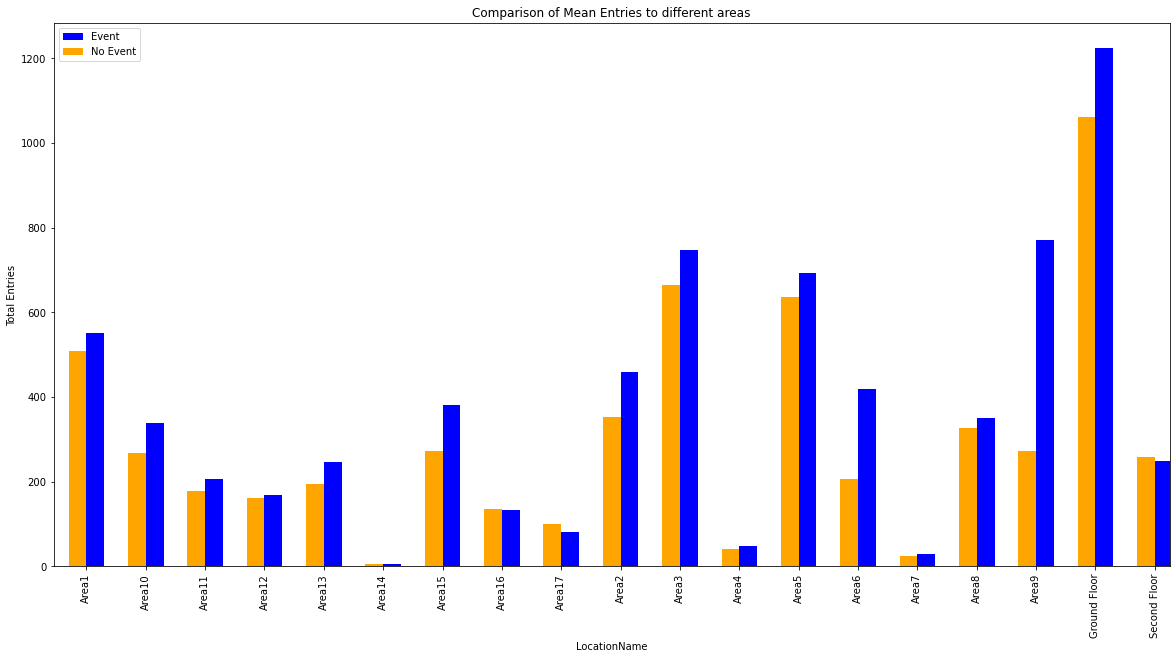



Comparison event day with non Event day 'Wed'

22/02/2023
01/03/2023
15/03/2023
Ground floor


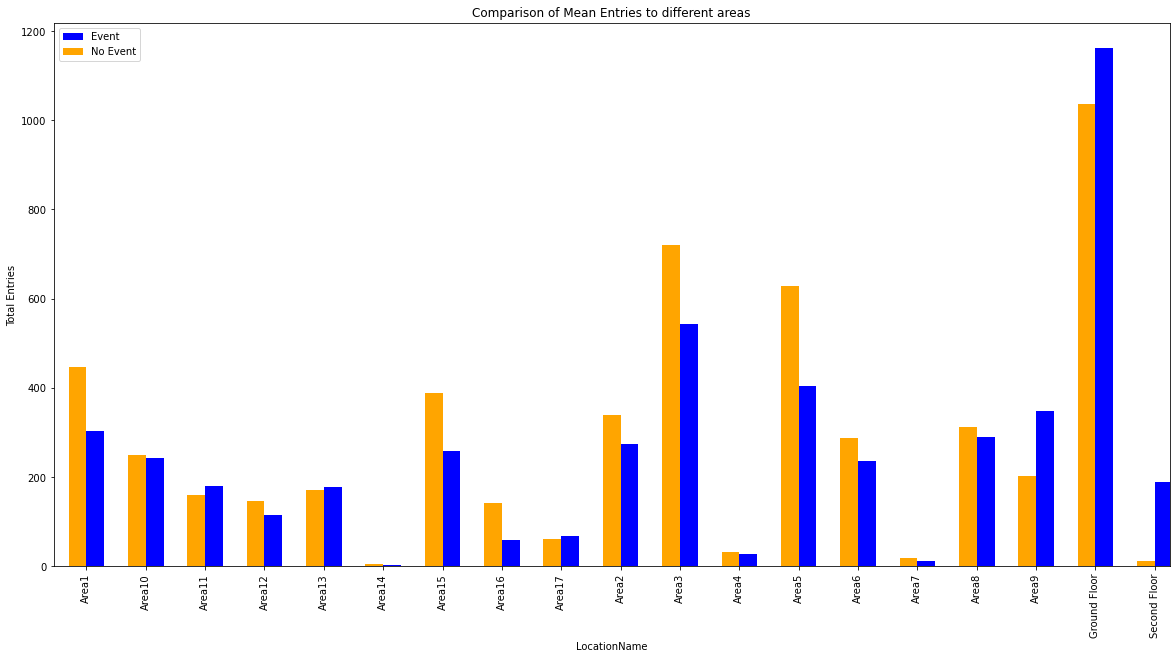

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

dfEvents = pd.read_csv("Marketing_events.csv")
dfMall = pd.read_csv("mall_data.csv")
dfArea = pd.read_csv("by_areas_data.csv")


def MarketingAnalysis(dfEvents,dfMall,dfArea):
    dfEvents['Start time'] = dfEvents['Start time'].str.split(' ').str[0]
    dfEvents['End Time'] = dfEvents['End Time'].str.split(' ').str[0]
#     dfMall.head()
#     dfArea.head()
#     dfEvents.head()

    # Impact of Event on Mall
    print(" \033[1m" + "# Impact of Event on Mall" + "\033[1m' + ")
    print()

    # Storing all events dates that are happeing in whole Mall
    MallEventDate = dfEvents['Eventdate'].tolist()

    EventDayName = dfEvents['day'].tolist()

    # Splitting Mall information into event and without event DataFrame.
    dfMallEvent = dfMall[dfMall['date'].isin(MallEventDate)]
    dMallNoEvent = dfMall[~dfMall['date'].isin(MallEventDate)]

    EventDayNameUnique = dfEvents['day'].unique()
    EventDayNameUnique = sorted(EventDayNameUnique, key=lambda x: ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'].index(x))

    fig, axs = plt.subplots(1, 7, figsize=(35,10))

    for i, day in enumerate(EventDayNameUnique):
        Eventdaydf = dfMallEvent[dfMallEvent['day']==day]
        NoEventdaydf= dMallNoEvent[dMallNoEvent['day']==day]

        MeanVisitorEventDay = np.mean(Eventdaydf['entry'])
        MeanVisitorNOEventDay = np.mean(NoEventdaydf['entry'])
        MeanValues = [round(MeanVisitorEventDay,2),round(MeanVisitorNOEventDay,2)]
        Labels = ['Event_Day', 'No Event']

        pie = axs[i].pie(MeanValues,labels=Labels,autopct='%1.1f%%')

        axs[i].set_title(f"Average Entries to Mall \n {day}", fontsize = 14)

    plt.show()
    
    for i, day in enumerate(EventDayNameUnique):
        Eventdaydf = dfMallEvent[dfMallEvent['day']==day]
        NoEventdaydf= dMallNoEvent[dMallNoEvent['day']==day]

        t_statistic, p_value = ttest_ind(Eventdaydf['entry'], NoEventdaydf['entry'])

        print(f"The comparison of Event day '{day}' with Non event Day '{day}'")
        print("t-statistic:", t_statistic)
        print("p-value:", p_value)
        print()
        print()
    
    # Reletive Strength of Events
    print("Relative strength of events")
    
    fig, axs = plt.subplots(1, 4, figsize=(20, 10))
    for i, day in enumerate(EventDayNameUnique[:4]):
        Eventdaydf = dfMallEvent[dfMallEvent['day']==day]
        axs[i].pie(Eventdaydf.groupby('date')['entry'].mean(), labels=Eventdaydf.groupby('date')['entry'].mean().index,autopct='%1.1f%%')
        axs[i].set_title(day)

    fig, axs = plt.subplots(1, 3, figsize=(13, 10))
    for i, day in enumerate(EventDayNameUnique[4:]):    

        Eventdaydf = dfMallEvent[dfMallEvent['day']==day]
        axs[i].pie(Eventdaydf.groupby('date')['entry'].mean(), labels=Eventdaydf.groupby('date')['entry'].mean().index,autopct='%1.1f%%')
        axs[i].set_title(day)
    plt.show()

    # Check whether the different between means is statistically significant of not
    print(" Checking Statistical Significant")

    for i, day in enumerate(EventDayNameUnique[:]):
        Eventdaydf = dfMallEvent[dfMallEvent['day']==day]
        try:

            dfAnova = pd.DataFrame() 
            for i,date in enumerate(Eventdaydf['date'].unique()):
                df1 = Eventdaydf[Eventdaydf['date']==date]
                col = df1['entry'].tolist()
                print()
                dfAnova.loc[:, f'column_{i}'] = col

            fvalue, pvalue = f_oneway(*[dfAnova[col] for col in dfAnova.columns])
            print(f"Comparing the mean of Events happens on {day}")
            print(f'F-value={fvalue}, p-value={pvalue}')
        except:
            print(f"Comparing the mean of Events happens on {day}")
            print("Number of column is less than two")
    
    # Impact of Event on Shopping Time
    print()
    print()
    print("\033[1m" + "# Impact of Event on Shopping Time"+"\033[1m" )
    print()

    # Define the weekday order
    weekday_order = ['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon']

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(10, 8))

    dfMallEvent.groupby('day')['shoppingtime'].mean().reindex(weekday_order).plot(kind='barh', position=0, width=0.3, label='Event', ax=ax, color='blue')
    dMallNoEvent.groupby('day')['shoppingtime'].mean().reindex(weekday_order).plot(kind='barh', position=1, width=0.3, label='No Event', ax=ax, color='orange')

    ax.set_yticklabels(weekday_order, fontsize=12)
    ax.set_title('Average Shopping time on Event and Non-Event day', fontsize=14)
    ax.set_xlabel("Average Shopping time")
    ax.legend()
    plt.show()
    
    # t-test to compare Shipping time for Event and Non-Event Data.
    print("\033[1m" + "# t-test to compare Shipping time for Event and Non-Event Data."+ "\033[1m" )
    for day in weekday_order:
        dfMallEvent_t_test  = dfMallEvent[dfMallEvent['day'] == day]
        dMallNoEvent_t_test = dMallNoEvent[dMallNoEvent['day'] == day]

        t_statistic, p_value = ttest_ind(dfMallEvent_t_test['shoppingtime'], dMallNoEvent_t_test['shoppingtime'])
        print(day)
        print("t-statistic:", t_statistic)
        print("p-value:", p_value)
        print()

        
    # Impact of Event on Mall over time
    print()
    print()
    print("\033[1m" + "# Impact of Event on Mall over time"+ "\033[1m" )
    print()

    def check_matching_time(start1, start2, end2):
        if start1 >= start2 and start1 <= end2:
            return "Yes"
        else:
            return ""

    renamedDfEvents = dfEvents.rename(columns = {'Start time': 'eventfromtime', 'Eventdate': 'date'})
    
    mergedDf = dfMallEvent.merge(renamedDfEvents, on = ['date'], how = 'outer')
    mergedDf['eventfromtime_x'] = pd.to_datetime(mergedDf['eventfromtime_x'], format='%H:%M:%S').dt.time
    mergedDf['eventfromtime_y'] = pd.to_datetime(mergedDf['eventfromtime_y'], format='%H:%M:%S').dt.time
    mergedDf['End Time'] = pd.to_datetime(mergedDf['End Time'], format='%H:%M:%S').dt.time
    mergedDf['date'] = pd.to_datetime(mergedDf['date']).dt.date
    renamedDfEvents['date'] = pd.to_datetime(renamedDfEvents['date']).dt.date
    mergedDf = mergedDf.dropna()

    mergedDf['event'] = mergedDf.apply(lambda x: check_matching_time(x["eventfromtime_x"], x["eventfromtime_y"], x["End Time"]), axis=1)

    mergedDf = mergedDf.sort_values(by = ['date', 'eventfromtime_x'])
    
    pivot = mergedDf.pivot(index = 'eventfromtime_x', columns = 'date', values = 'entry').dropna().sort_values(by = 'eventfromtime_x').transpose().sort_values(by = 'date')

    eventDates = renamedDfEvents.dropna().date.unique()
    
    dfMall['eventfromtime'] = pd.to_datetime(dfMall['eventfromtime'], format='%H:%M:%S').dt.time
    dfMall['date'] = pd.to_datetime(dfMall['date']).dt.date

    annotation = []

    for date in eventDates:
        eventDayData = mergedDf[mergedDf['date'] == date]
        eventDayData = eventDayData[eventDayData['event'] == 'Yes']
        if (len(eventDayData)>0):
            eventDay = eventDayData['day_x'].unique()[0]
        eventHours = eventDayData['eventfromtime_x'].values.tolist()

        nonEventDayData = dfMall[(dfMall['day'] == eventDay) & (dfMall['date'] != date) & 
                                   (dfMall['eventfromtime'].isin(eventHours))]

        tvalues = []
        pvalues = []

        for i in range(0, len(eventDayData)):
            eventDayVisits = (eventDayData.iloc[i:i+2, 4])
            nonEventDayVisits = (nonEventDayData.iloc[i:i+2, 4])
            if len(eventDayVisits) == 1:
                eventDayVisits = eventDayData.iloc[i-1:i+2, 4]
                nonEventDayVisits = nonEventDayData.iloc[i-1:i+2, 4]
            tvalue, pvalue = (ttest_ind(eventDayVisits, nonEventDayVisits))

            tvalues.append(round(tvalue, 3))
            pvalues.append(round(pvalue, 3))

        finalDf = mergedDf[mergedDf['date'] == date]
        rowIndex = finalDf[finalDf['event'] == 'Yes'].index

        finalDf.loc[rowIndex, 'tvalue'] = tvalues
        finalDf.loc[rowIndex, 'pvalue'] = pvalues

        finalDf = finalDf.fillna("")

        finalDf['annot'] = finalDf['event'] + '\n' + 't:' + finalDf['tvalue'].astype('str') + '\n' + 'p:' + finalDf['pvalue'].astype('str')

        finalDf = finalDf.replace("\nt:\np:", '')

        annotation.append(finalDf['annot'].values.tolist())
    
    
    plt.figure(figsize = (30,15))

    sns.heatmap(pivot, cmap='coolwarm', linewidths=0.5, annot = np.asarray(annotation), fmt = "")
    plt.title('Impact of Events on number of visitors (Yes shows event happening)')
    plt.xlabel('\nTime (24 hours)')
    plt.show()
    
    # Impact of Events on Area of the Mall
    print()
    print()
    print("\033[1m" + "# Impact of Events on Area of the Mall"+ "\033[1m")
    print()
    
    
    AreaEventdf = dfEvents[dfEvents['Area']!='Mall']
    EventDateArea = AreaEventdf['Eventdate'].tolist()

    for i, date in enumerate(EventDateArea):

        fig, ax = plt.subplots(figsize=(20, 10))

        dfAreaSample = dfArea[dfArea['date']==date]
        day = dfAreaSample['dayname'].unique()[0]
        print(f"Comparison event day with non Event day '{day}'")
        print()

        dfAllNonEventSample = pd.DataFrame()
        dfNonEventDaySampleDate = dfAreaNoEvent[dfAreaNoEvent['dayname']==str(day)]['date'].unique()

        for date in dfNonEventDaySampleDate:
            print(date)
            dfNonEventSample = dfArea[dfArea['date']==date]

            dfAllNonEventSample  = pd.concat([dfAllNonEventSample, dfNonEventSample],ignore_index=True)

        AllNonDay = dfNonEventSample.groupby('LocationName')['entrances'].mean().reset_index()

        dfAreaSample.groupby('LocationName')['entrances'].mean().plot(kind = 'bar',position=0,width=0.3,label='Event',ax=ax ,color = 'blue')
        AllNonDay.groupby("LocationName")['entrances'].mean().plot(kind = 'bar',position=1,width=0.3,label='No Event', ax=ax, color = 'orange')

        EventArea = AreaEventdf['Area'].tolist()[i]
        print(EventArea)
        ax.set_ylabel("Total Entries")
        ax.set_title(f"Comparison of Mean Entries to different areas")
        ax.legend()

        plt.show()
        print()
        print()
MarketingAnalysis(dfEvents,dfMall,dfArea)